<a href="https://colab.research.google.com/github/KateMorf/icev-notebooks/blob/main/2_S%C3%A1bado_(25_09_2021).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Praticando KDD no Titanic dataset**
# https://github.com/KateMorf/audit-data-analysis/

In [1]:
!pip install -U pandas-profiling

     |████████████████████████████████| 248 kB 5.4 MB/s 
     |████████████████████████████████| 675 kB 42.5 MB/s 
     |████████████████████████████████| 3.1 MB 30.2 MB/s 
     |████████████████████████████████| 102 kB 34.4 MB/s 
     |████████████████████████████████| 10.1 MB 41.7 MB/s 
     |████████████████████████████████| 636 kB 33.0 MB/s 
     |████████████████████████████████| 62 kB 790 kB/s 
     |████████████████████████████████| 812 kB 28.1 MB/s 
     |████████████████████████████████| 28.5 MB 47 kB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=a42e0df2ba22032fab6a15c3f25ef23c2fa68c14a528c90da749168542acd07e
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=b96d0a1b6c120cfecaafcb83ba085cdbbcf2f69723f0291cd66a1af11cdb646d
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e

In [3]:
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport
import numpy as np

# **Análise Exploratório de Dados**

### Conhecendo o Dataset do Titanic
### Atributos existentes:
### ---- **PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked**
### Descrição dos atributos:<br>
**PassengerId**: Passenger ID<br>
 **Pclass**: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)<br>
 **Survived**: Survival (0 = No; 1 = Yes)<br>
 **Name**: Name<br>
 **Sex**: Sex<br>
 **Age**: Age<br>
 **SibSp**: Number of Siblings/Spouses Aboard<br>
 **Parch**: Number of Parents/Children Aboard<br>
 **Ticket**: Ticket Number<br>
 **Fare**: Passenger Fare (British pound)<br>
 **Cabin**: Cabin<br>
 **Embarked**: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)<br>

In [4]:
# lendo arquivo csv com o método read_csv()
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

In [9]:
# retornar os N primeiros elementos do DataFrame
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# retornar os N últimos elementos do DataFrame
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [12]:
# renomear colunas com o método rename()
df.rename(columns={"PassengerId": "Id_Passageiro", "Survived": "Sobreviveu", "Pclass": "Passageiro_classe", "Name": "Nome", 
                   "Sex": "Sexo", "Age": "Idade", "SibSp": "Num_Irmaos_Conjugue_a_Bordo", "Parch": "Num_Pais_Filhos_a_Bordo",
                   "Fare": "Tarifa", "Cabin": "Cabine", "Embarked": "Embarcou"}).head()

,Id_Passageiro,Sobreviveu,Passageiro_classe,Nome,Sexo,Idade,Num_Irmaos_Conjugue_a_Bordo,Num_Pais_Filhos_a_Bordo,Ticket,Tarifa,Cabine,Embarcou
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
# renomear colunas com o método rename() e salvar em um novo dataframe
df = df.rename(columns={"PassengerId": "Id_Passageiro", "Survived": "Sobreviveu", "Pclass": "Passageiro_classe", "Name": "Nome", 
                   "Sex": "Sexo", "Age": "Idade", "SibSp": "Num_Irmaos_Conjugue_a_Bordo", "Parch": "Num_Pais_Filhos_a_Bordo",
                   "Fare": "Tarifa", "Cabin": "Cabine", "Embarked": "Embarcou"})

In [15]:
# retornar informações sobre os dados de cada coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id_Passageiro                891 non-null    int64  
 1   Sobreviveu                   891 non-null    int64  
 2   Passageiro_classe            891 non-null    int64  
 3   Nome                         891 non-null    object 
 4   Sexo                         891 non-null    object 
 5   Idade                        714 non-null    float64
 6   Num_Irmaos_Conjugue_a_Bordo  891 non-null    int64  
 7   Num_Pais_Filhos_a_Bordo      891 non-null    int64  
 8   Ticket                       891 non-null    object 
 9   Tarifa                       891 non-null    float64
 10  Cabine                       204 non-null    object 
 11  Embarcou                     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
# indexação do DataFrame com a coluna Id_Passageiro
df.set_index('Id_Passageiro', inplace=True)

In [17]:
df.head()

,Sobreviveu,Passageiro_classe,Nome,Sexo,Idade,Num_Irmaos_Conjugue_a_Bordo,Num_Pais_Filhos_a_Bordo,Ticket,Tarifa,Cabine,Embarcou
Id_Passageiro,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
# retornar as colunas do DataFrame
df.columns

Index(['Sobreviveu', 'Passageiro_classe', 'Nome', 'Sexo', 'Idade',
       'Num_Irmaos_Conjugue_a_Bordo', 'Num_Pais_Filhos_a_Bordo', 'Ticket',
       'Tarifa', 'Cabine', 'Embarcou'],
      dtype='object')

In [19]:
# retornar os valores do DataFrame em numpy array
df.values

array([[0, 3, 'Braund, Mr. Owen Harris', ..., 7.25, nan, 'S'],
       [1, 1, 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)', ...,
        71.2833, 'C85', 'C'],
       [1, 3, 'Heikkinen, Miss. Laina', ..., 7.925, nan, 'S'],
       ...,
       [0, 3, 'Johnston, Miss. Catherine Helen "Carrie"', ..., 23.45,
        nan, 'S'],
       [1, 1, 'Behr, Mr. Karl Howell', ..., 30.0, 'C148', 'C'],
       [0, 3, 'Dooley, Mr. Patrick', ..., 7.75, nan, 'Q']], dtype=object)

In [20]:
# tipo do retorno é numpy array
type(df.values)

numpy.ndarray

### Filtrando os dados do tipo object e float

In [21]:
# filtrando dados com tipo object e retornando a contagem de não nulos de cada coluna
df.select_dtypes(include=['object']).count()

Nome        891
Sexo        891
Ticket      891
Cabine      204
Embarcou    889
dtype: int64

In [24]:
# filtrando dados com tipo float e retornando a contagem de não nulos de cada coluna
df.select_dtypes(include=['float']).count()

Idade     714
Tarifa    891
dtype: int64

### Encontrando informações importantes sobre os dados

In [25]:
# retornar valores da coluna Idade
df["Idade"]

Id_Passageiro
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
       ... 
887    27.0
888    19.0
889     NaN
890    26.0
891    32.0
Name: Idade, Length: 891, dtype: float64

In [26]:
# retornar a contagem de repetições de cada registro encontrado na coluna Idade
df["Embarcou"].value_counts()

S    644
C    168
Q     77
Name: Embarcou, dtype: int64

In [27]:
df.groupby(["Embarcou"]).mean()[["Idade", "Tarifa"]]

,Idade,Tarifa
Embarcou,,
C,30.814769,59.954144
Q,28.089286,13.276030
S,29.445397,27.079812


In [28]:
df.groupby(['Embarcou']).sum()[['Sobreviveu']].sort_values('Sobreviveu')

,Sobreviveu
Embarcou,
Q,30
C,93
S,217


In [29]:
# retorna as dimensões do DataFrame
print(df.shape)
print(df.shape[0])
print(df.shape[1])

(891, 11)
891
11


In [35]:
# filtrando por local de embarque e dividindo a quantidade de sobreviventes pelo total de sobreviventes e ao final formatando os valores para exibir como porcentagem
((df.groupby(['Embarcou']).sum()[['Sobreviveu']]/df.shape[0])*100).sort_values('Sobreviveu').round(1).astype(str) + '%'

,Sobreviveu
Embarcou,
Q,3.4%
C,10.4%
S,24.4%


### Módulo pandas_profiling
### Gera relatórios de perfil de um DataFrame do pandas. A função pandas **df.describe()** é ótima, mas um pouco básica para análises exploratórias sérias de dados. O pandas_profiling estende o DataFrame do pandas com **df.profile_report()** para análise rápida de dados.
### [Link](https://pandas-profiling.github.io/pandas-profiling/examples/titanic/titanic_report.html) para profile do Titanic

In [36]:
# gerando relatório e salvando na variável profile
profile = df.profile_report(title="Titanic - Pandas Profiling Report", html={'style': {'full_width': True}})

In [37]:
# exportando o resultado para .html para visualização do relatório
profile.to_file(output_file="report.html")

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Describe dos dados
df.describe()

,Sobreviveu,Passageiro_classe,Idade,Num_Irmaos_Conjugue_a_Bordo,Num_Pais_Filhos_a_Bordo,Tarifa
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Visualização dos dados por meio de gráficos

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Distribuição estatística dos dados

##### Histograma
Para análise e representação de dados quantitativos, agrupados em classes de freqüência

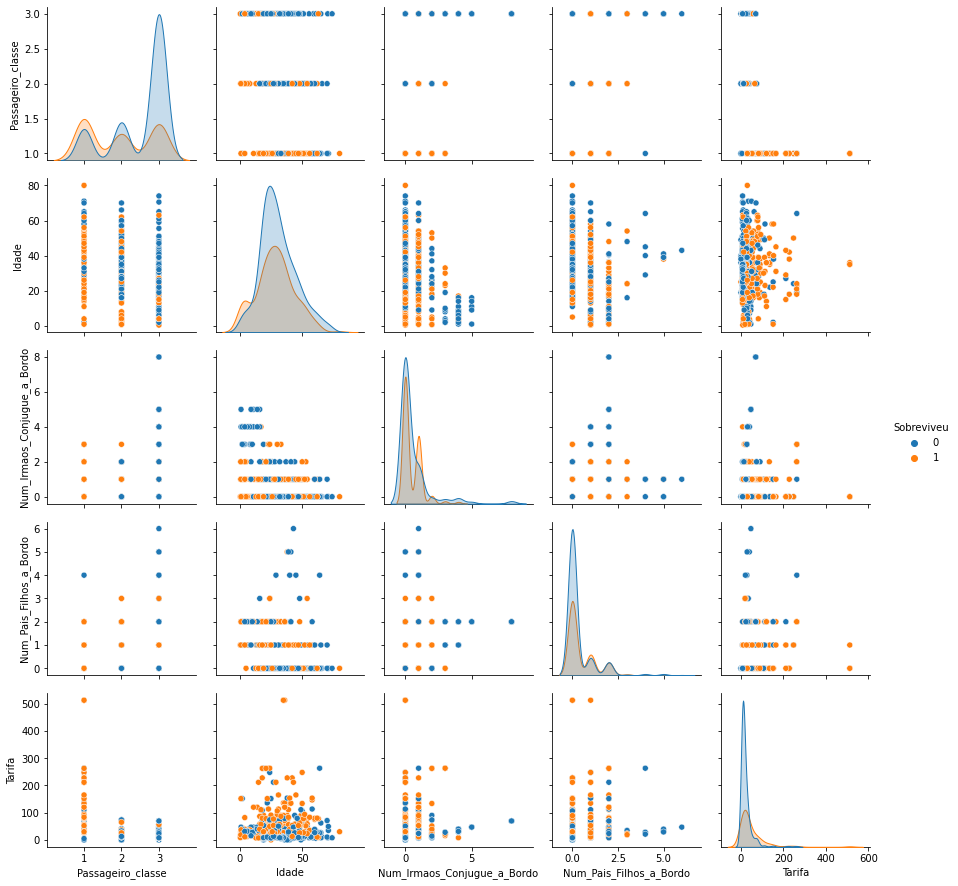

In [40]:
sns.pairplot(data=df, hue='Sobreviveu')

#### Quais grupos de pessoas tinham mais chances de sobrevivência?

##### **Gráfico de barras**
##### Para dados de séries não temporais rotulados

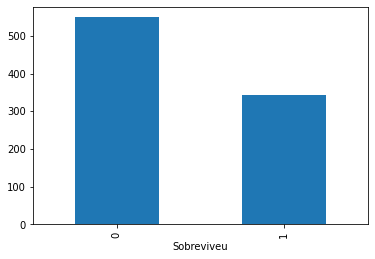

In [41]:
df.groupby('Sobreviveu').count()['Passageiro_classe'].plot.bar()

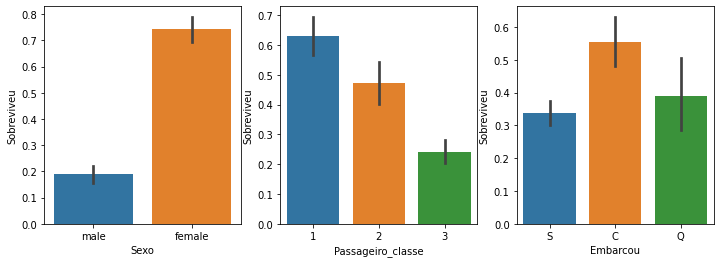

In [ ]:
# Plot para Sobrevivente vs. Sexo, Passageiro_classe e Embarcou
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(12,4))

sns.barplot(x='Sexo', y='Sobreviveu', data=df, ax=axis1)
sns.barplot(x='Passageiro_classe', y='Sobreviveu', data=df, ax=axis2)
sns.barplot(x='Embarcou', y='Sobreviveu', data=df, ax=axis3);

In [42]:
df.groupby('Embarcou').count()['Passageiro_classe']

Embarcou
C    168
Q     77
S    644
Name: Passageiro_classe, dtype: int64

In [43]:
# Probabilidade de sobrevivência pelo Sexo
df[['Sexo', 'Sobreviveu']].groupby(['Sexo']).mean()

,Sobreviveu
Sexo,
female,0.742038
male,0.188908


In [44]:
df.Sexo.value_counts()

male      577
female    314
Name: Sexo, dtype: int64

Conclusão

1.   Mulheres tem mais chance de sobreviverem que os homens (75% vs. 18%)
2.   Passageiros da 3ª Classe tem menos da metade de chance de escaparem do desastre que aqueles passageiros que estão na 1ª Classe



#### Influência da idade na probabilidade de sobrevivência

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


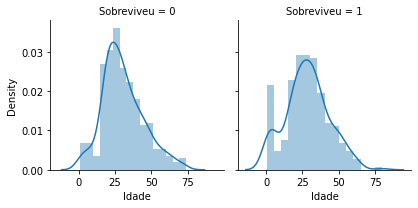

In [45]:
idade_sobreviveu = sns.FacetGrid(df, col='Sobreviveu')
idade_sobreviveu.map(sns.distplot, 'Idade')

Conclusão

*  Ao analisar também a distribuição é possível ver um pico no lado dos sobreviventes para crianças pequenas. O comportamento dos dois gráficos é bem parecido, mas esse detalhe é bem importante pois confirma a hipótese que crianças também tem maior chance de sobreviverem: “Crianças e mulheres primeiro”.



#### Scatter plot dos dados

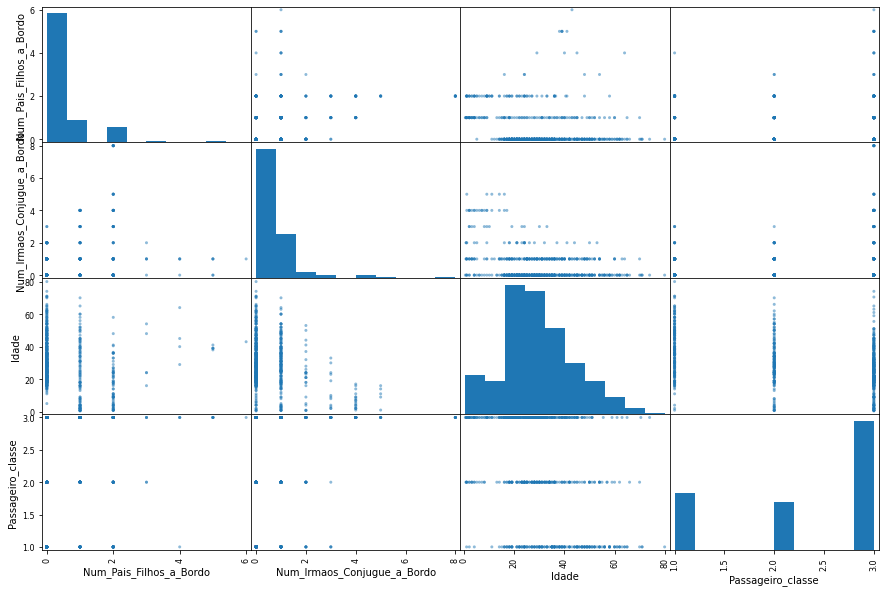

In [46]:
columns = ['Num_Pais_Filhos_a_Bordo', 'Num_Irmaos_Conjugue_a_Bordo', 'Idade', 'Passageiro_classe']
pd.plotting.scatter_matrix(df[columns], figsize=(15,10));

Conclusão


*  A vantagem desse tipo de gráfico é que a diagonal dele traz informação útil, exibindo um histograma de cada atributo (outras opções estão disponíveis). Rapidamente a gente consegue ver coisas como – por exemplo – o fato de que pessoas mais velhas estão mais concentradas na 1ª Classe e pessoas mais jovens na 3ª classe.



#### Heatmap - Olhando para a correlação entre os atributos

Entender o relacionamento entre os atributos, pode ser útil na análise e modelagem de dados. *O relacionamento estatístico entre duas variáveis é referenciado como correlação.*

A correlação pode ser:


*   **Positiva**: quando ambos atributos se movem na mesma direção.
*   **Neutra**: quando os atributos não têm relação.
*   **Negativa**: quando o valor de um atributo aumento, o valor de outro atributo diminui.

A performance de alguns algoritmos pode ser prejudicada se duas ou mais variáveis são fortemente relacionadas. Um exemplo é o algoritmo Linear Regression, onde uma dos atributos correlacionados deve ser removido para melhor a performance do modelo.

A correlação entre duas variáveis também pode ser utilizada para análise dos dados e verificar quais atributos são mais relevantes para o desenvolvimento do modelo.



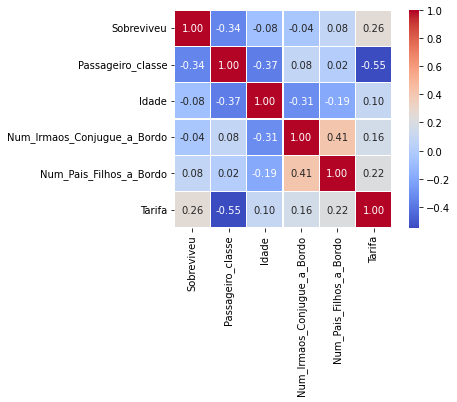

In [52]:
sns.heatmap(df.corr(), cmap='coolwarm', fmt='.2f', linewidths=0.1, vmax=1.0,
            square=True, linecolor='white', annot=True)

In [51]:
df.corr()

,Sobreviveu,Passageiro_classe,Idade,Num_Irmaos_Conjugue_a_Bordo,Num_Pais_Filhos_a_Bordo,Tarifa
Sobreviveu,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Passageiro_classe,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Idade,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
Num_Irmaos_Conjugue_a_Bordo,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Num_Pais_Filhos_a_Bordo,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Tarifa,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


# **Preparação de Dados**

### Limpeza e Pré-processamento

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# renomear colunas com o método rename()
df = df.rename(columns={"PassengerId": "Id_Passageiro", "Survived": "Sobreviveu", "Pclass": "Passageiro_classe", "Name": "Nome", 
                   "Sex": "Sexo", "Age": "Idade", "SibSp": "Num_Irmaos_Conjugue_a_Bordo", "Parch": "Num_Pais_Filhos_a_Bordo",
                   "Fare": "Tarifa", "Cabin": "Cabine", "Embarked": "Embarcou"})

In [ ]:
df

,Id_Passageiro,Sobreviveu,Passageiro_classe,Nome,Sexo,Idade,Num_Irmaos_Conjugue_a_Bordo,Num_Pais_Filhos_a_Bordo,Ticket,Tarifa,Cabine,Embarcou
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### Identificação de registros ausentes e duplicados

In [ ]:
# contando a quantidade de valores ausentes por coluna:
df.isnull().sum()

Id_Passageiro                    0
Sobreviveu                       0
Passageiro_classe                0
Nome                             0
Sexo                             0
Idade                          177
Num_Irmaos_Conjugue_a_Bordo      0
Num_Pais_Filhos_a_Bordo          0
Ticket                           0
Tarifa                           0
Cabine                         687
Embarcou                         2
dtype: int64

In [ ]:
# contando a quantidade total de valores NaN (not a number)
df.isna().sum()

Id_Passageiro                    0
Sobreviveu                       0
Passageiro_classe                0
Nome                             0
Sexo                             0
Idade                          177
Num_Irmaos_Conjugue_a_Bordo      0
Num_Pais_Filhos_a_Bordo          0
Ticket                           0
Tarifa                           0
Cabine                         687
Embarcou                         2
dtype: int64

In [ ]:
# contando a quantidade de duplicados
df.shape[0] - df.drop_duplicates().shape[0]

0

#### Selecionar as *features* relevantes

Vamos remover as features: ['Id_Passageiro', 'Nome', 'Ticket', 'Cabine'] porque não apresentam tanta relevância para a análise
Assim, ficamos com as seguintes variáveis a serem tratadas e preparadas: ['Passageiro_classe', 'Sexo', 'Idade', 'Num_Irmaos_Conjugue_a_Bordo', 'Num_Pais_Filhos_a_Bordo', 'Tarifa', 'Embarcou', 'Sobreviveu'].



In [ ]:
# como a coluna cabine possui muitas linhas vazias vamos removê-la
df.drop(columns=['Id_Passageiro', 'Nome', 'Ticket', 'Cabine'], axis=1, inplace=True)

#### Tratando valores faltantes


*   Preencher esses valores arbitrariamente (média, mediana, valor mais frequente);
*   Excluir a linha inteira.

Obs.: Nunca é bom descartar dados, principalmente em bases pequenas como a do Titanic



In [ ]:
# Vamos completar os valores faltantes
# Idade
idade_mediana = df.Idade.median()
df.Idade.fillna(idade_mediana, inplace=True)

#Embarcou
embarcou_top = df.Embarcou.value_counts().index[0]
df.Embarcou.fillna(embarcou_top, inplace=True)

In [ ]:
# remover todas as linhas da coluna Embarcou que possuem valor NaN (not a number)
# df = df[df.Embarcou.isna() != True]

In [ ]:
df.isnull().sum()

Sobreviveu                     0
Passageiro_classe              0
Sexo                           0
Idade                          0
Num_Irmaos_Conjugue_a_Bordo    0
Num_Pais_Filhos_a_Bordo        0
Tarifa                         0
Embarcou                       0
dtype: int64

### Transformação de dados

#### Transformação dos atributos para os modelos de Machine Learning



*   O modelo matemático exige que trabalhemos com variáveis numéricas, ou seja, temos transformar os dados de entrada que estão em formato categoria para números. Como você vê abaixo, eu convertir os valores possíveis de Sexpara {'male': 0, 'female': 1}. Já em relação à variável Embarked, apliquei o conceito OneHotEncoding. Nesse conceito, são geradas uma quantidade de colunas igual a quantidade de categorias da coluna original. As colunas geradas assumem aqui apenas valores 0 e 1, onde o valor 1 indica a categoria para aquele registro e as demais colunas geradas assumem valor 0.


In [ ]:
# Converter Sexo para 0 e 1
df.Sexo = df.Sexo.map({'male': 0, 'female': 1})

In [ ]:
# Transformando a coluna Embarcou
embarcou_ohe = pd.get_dummies(df.Embarcou, prefix='Embarcou')
df = pd.concat([df, embarcou_ohe], axis=1)
df.drop('Embarcou', axis=1, inplace=True)

In [ ]:
df.Embarcou_C = df.Embarcou_C.astype('int64')
df.Embarcou_S = df.Embarcou_S.astype('int64')
df.Embarcou_Q = df.Embarcou_Q.astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sobreviveu                   891 non-null    int64  
 1   Passageiro_classe            891 non-null    int64  
 2   Sexo                         891 non-null    int64  
 3   Idade                        891 non-null    float64
 4   Num_Irmaos_Conjugue_a_Bordo  891 non-null    int64  
 5   Num_Pais_Filhos_a_Bordo      891 non-null    int64  
 6   Tarifa                       891 non-null    float64
 7   Embarcou_C                   891 non-null    int64  
 8   Embarcou_Q                   891 non-null    int64  
 9   Embarcou_S                   891 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 69.7 KB


In [ ]:
df.head()## Transformação

,Sobreviveu,Passageiro_classe,Sexo,Idade,Num_Irmaos_Conjugue_a_Bordo,Num_Pais_Filhos_a_Bordo,Tarifa,Embarcou_C,Embarcou_Q,Embarcou_S
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1


#### Redução de dimensionalidade usando a **Principal Component Analysis (PCA)**

PCA é um método frequentemente usado para reduzir a dimensionalidade de grandes base de dados, transformando um conjunto grande de atributos em um conjunto menor que ainda contém a maior parte da informação do conjunto maior.

Ao aplicar o PCA nos dados realizamos uma transformação onde as novas variáveis construídas são chamadas de Componentes Principais, onde cada Componente é uma combinação linear dos atributos orignais.Estas combinações são feitas que os novos atributos gerados (componentes principais) sejam não-correlacionadas e a maior parte da informação inicial dos atributos é comprimido nas primeiras componentes.

Além disso, PCA pode ser utilizado para visualizar os dados em um plano bi ou tridimensional sem perder a representação geral dos dados, visto a impossibilidade de representar dados de mais dimensões em um plano cartesiano.

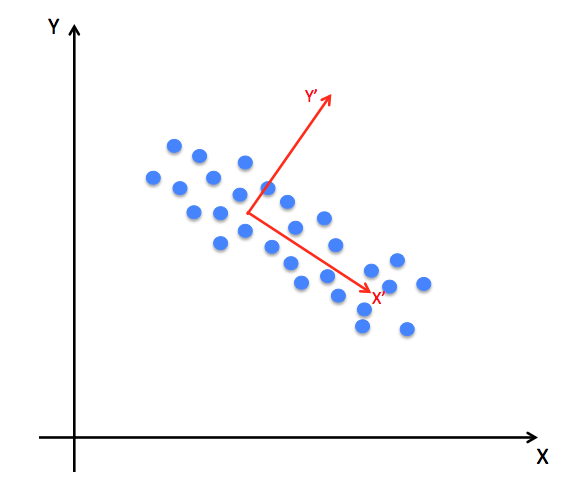

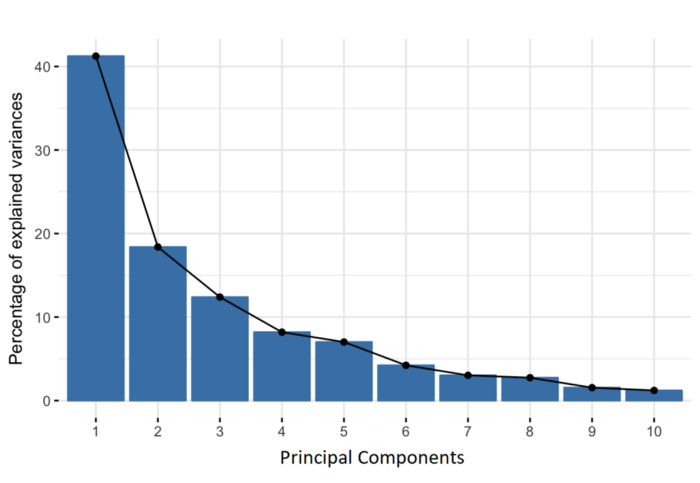



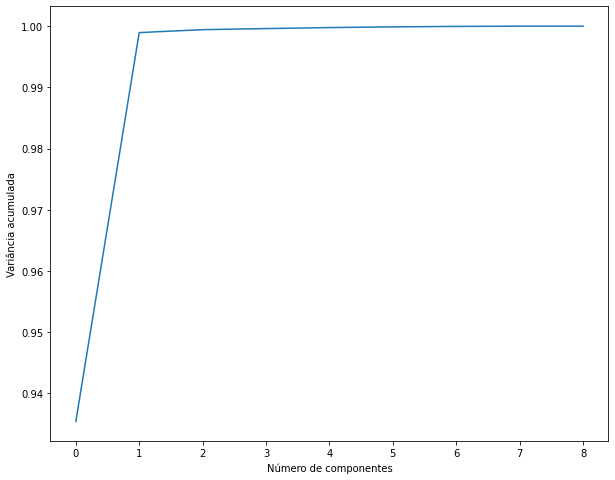

In [ ]:
# Visualizando a variância acumulada do PCA para os Dados do Titanic
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def plot_variancia_acumulada(pca):
    plt.figure(figsize=(10,8))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('Número de componentes')
    plt.ylabel('Variância acumulada');

X = df.drop(columns=['Sobreviveu'])
y = df[['Sobreviveu']]

pca = PCA().fit(X)
plot_variancia_acumulada(pca)

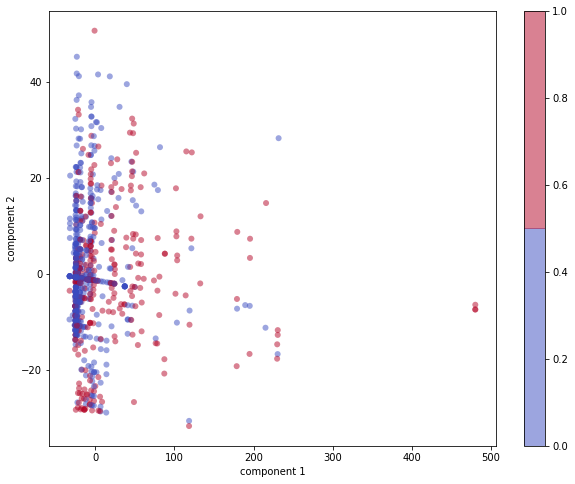

In [ ]:
# Aplicando PCA nos dados do Titanic

def plot_pca(df_pca, y):
    plt.figure(figsize=(10,8))
    plt.scatter(df_pca[:, 0], df_pca[:, 1],
                c=y.values, edgecolor='none', alpha=0.5,
                cmap=plt.cm.get_cmap('coolwarm', 2))
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    plt.colorbar();

pca = PCA(2)
df_pca = pca.fit_transform(X)
plot_pca(df_pca, y)

#### Preparando datasets de treino e teste usando o Sklearn (holdout)

* Nesse tipo de treinamento a base é dividida em um conjunto de treino (2/3) e 
teste (1/3). Ou treino 80% e teste 20%.

* Objetivo da análise é medir a probabilidade de sobrevivência dos passageiros do Titanic.

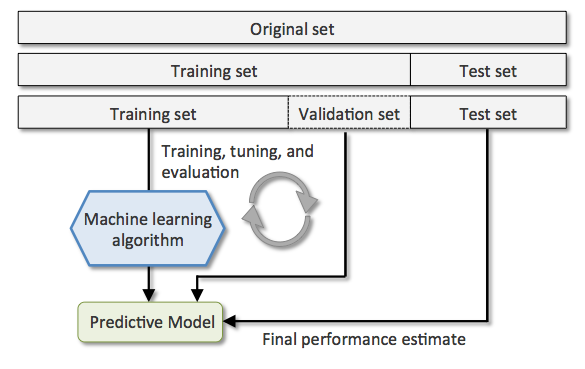



In [ ]:
from sklearn.model_selection import train_test_split
# dividir os dados onde 80% para train e 20% para test

X = df[['Passageiro_classe', 'Sexo', 'Idade', 'Num_Irmaos_Conjugue_a_Bordo', 
        'Num_Pais_Filhos_a_Bordo', 'Tarifa', 
        'Embarcou_C', 'Embarcou_Q', 'Embarcou_S']].copy()

y = df.Sobreviveu

X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.8)

In [ ]:
print('X1 - Treino:', X1.shape[0])
print('y1 - Treino:', y1.shape[0])
print('X2 - Teste:', X2.shape[0])
print('y2 - Teste:', y2.shape[0])

X1 - Treino: 712
y1 - Treino: 712
X2 - Teste: 179
y2 - Teste: 179


# **Construção do Modelo**

Supervisionado
*   Logistic Regression
*   K- vizinhos - K-NN
*   Árvore de Decisão - Decision Tree

Não-supervisionado
*   K-means


## Modelo de Logistic Regression (LR)

É um algoritmo que pode ser usado tanto para regressão quanto para classificação. É usado para predizer variáveis categóricas com a ajuda das variáveis dependentes.

Consideranco que há duas classes e um novo é analisado e verificado a qual classe pertence. O Logistic Regression calcula uma probabilidade para o novo ponto que varia de 0 (0%) a 1 (100%).

Por exemplo, se irá chover hoje ou não. No LR as entradas passam por uma função de ativação chamada **sigmoid** e a curva obtida é chamada de **curva sigmoid**.

A função sigmoid é uma curva com formato 'S' que pega qualquer valor real e o converte para um valor entre 0 e 1. Se a saída dada pela função sigmoid é mais que 0.5 (50%), a saída é classificada como sendo da classe 1. Se for menos que 0.5, a saída é classificada como da classe 0.


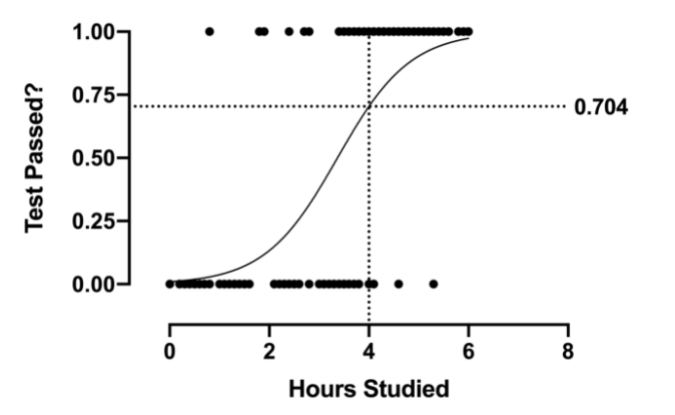




In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_model = LogisticRegression(random_state=0, solver='liblinear')
lr_model.fit(X1, y1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
acc_linReg = round(lr_model.score(X1, y1)*100, 2)
print('Acurácia do modelo de Regressão Linear: {}'.format(acc_linReg))

Acurácia do modelo de Regressão Linear: 79.92


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


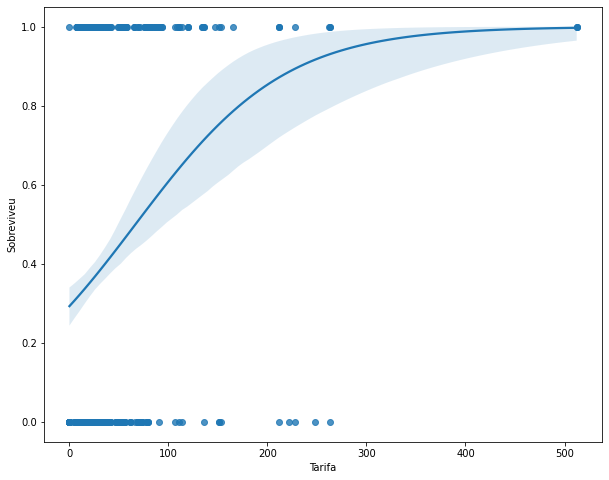

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,8))
sns.regplot(x='Tarifa', y='Sobreviveu', data=pd.concat([X1,y1], axis=1),
            logistic=True)

## Modelo de K-NN

K-nearest neighbors (KNN) é um algoritmo de Machine Learning supervisionado usado tanto para classificação quanto regressão. O funcionamento do algoritmo pode ser explicado como: *"O valor de um ponto é determinado pelos pontos a sua volta"*

Exemplo:

*   Se você tem um amigo próximo e passa a maior parte com ele/ela, vocês estará compartilhando os mesmos interesses e gostando das mesmas coisas. Esse é o caso do KNN com k=1. 
*   Se você sempre sai com um grupo de 5, cada um do grupo tem um efeito sobre o seu comportamento e você acabará sendo a média desses 5. Esse é o caso do KNN com k=5.

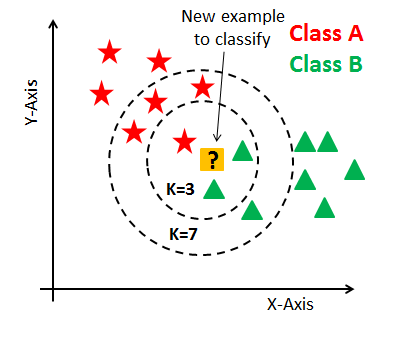

O KNN determina a classe de um ponto pelo princípio de votação majoritária. Se k é 5, as classses dos 5 pontos mais próximos são avaliadas. A predição acontece de acordo com a classe que possui a maioria de exemplos próximos.

Para identificar os pontos próximos, usamos algumas técnicas que calculam a distância, como a Distância Euclidiana.

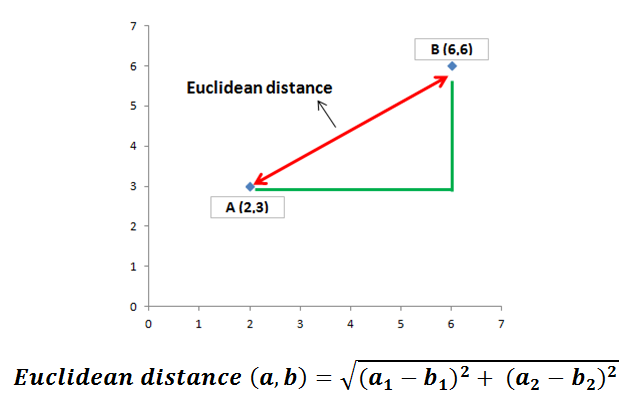






In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X1, y1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
acc_knn = round(knn_model.score(X1, y1)*100, 2)
print('Acurácia do modelo de KNN: {}'.format(acc_knn))

Acurácia do modelo de KNN: 96.91


## Modelo de Decision Tree

O algoritmo de Árvore de Decisão (Decision Tree) pode ser usado tanto para problemas de classificação quanto regressão. O objetivo da Decision Tree é criar um modelo de treinamento que pode ser usado para predizer a classe ou valor do atributo alvo **a partir do aprendizado de simples regras de decisão** obtidos de um conjunto de dados de treino.

Nas Árvores de Decisão, para predizer a classe alvo para um registro nós começamos pela raiz da árvore. Nós comparamos os valores do atributo raiz com o atributo presente no registro. Dependendo do resultado da comparação, nós seguimos o ramo correspondente ao valor e seguimos para o próximo nó.

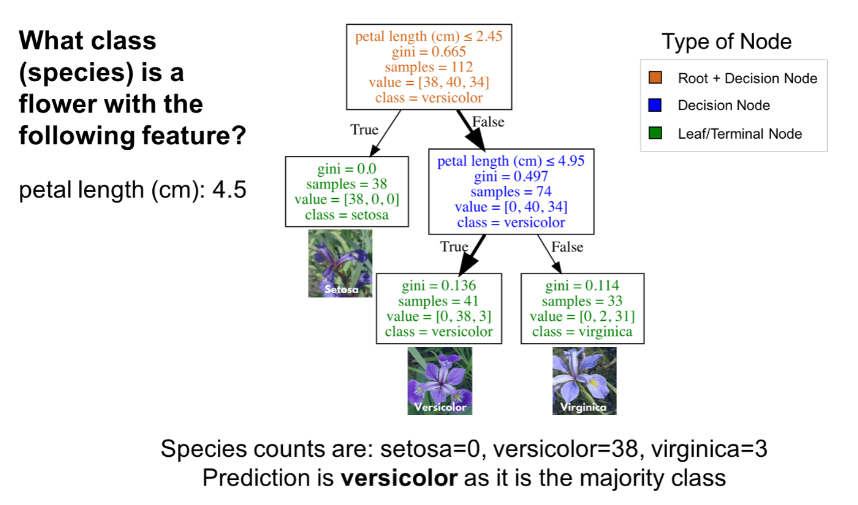

Fonte: https://towardsdatascience.com/understanding-decision-trees-for-classification-python-9663d683c952





In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_model = DecisionTreeClassifier(random_state=0, max_depth=2)
dt_model.fit(X1, y1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

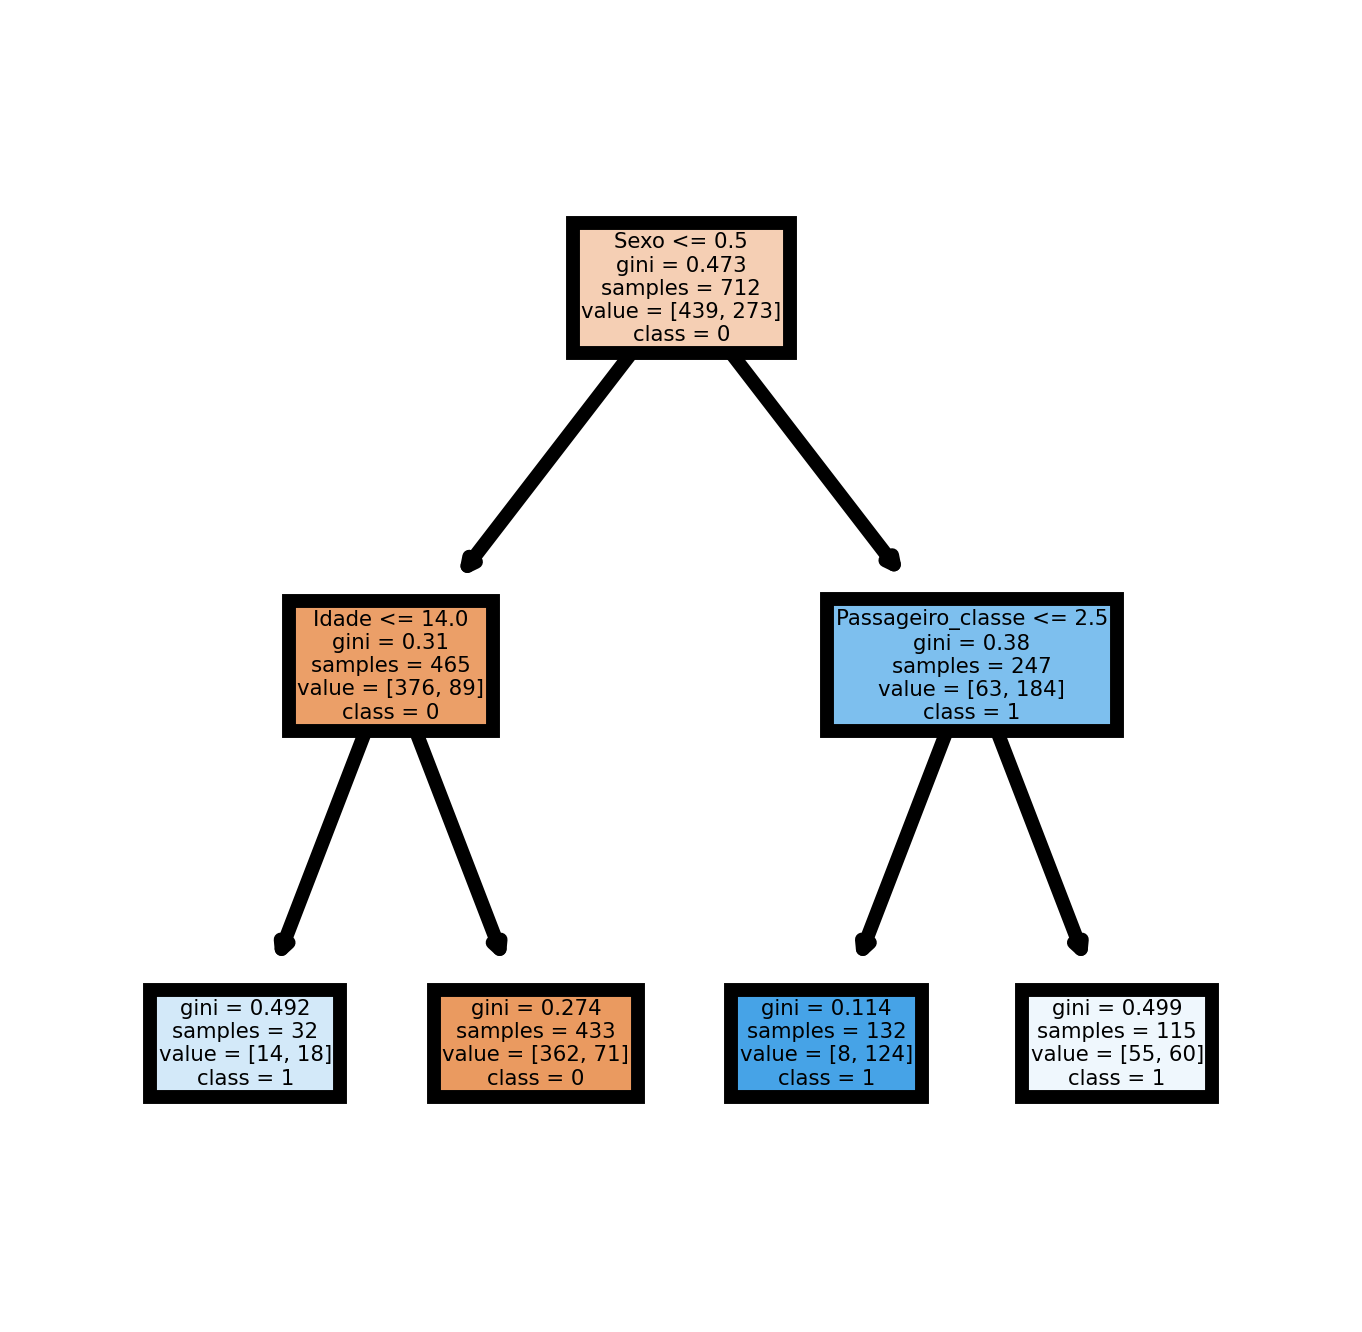

In [ ]:
# Imprimindo a Árvore gerada no treinamento
from sklearn import tree

fn=X1.columns
cn=['0','1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (1.5,1.5), dpi=1000)
tree.plot_tree(dt_model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

fig.savefig('dt_tree.png')

In [ ]:
acc_dt = round(dt_model.score(X1, y1)*100, 2)
print('Acurácia do modelo de DT: {}'.format(acc_dt))

Acurácia do modelo de DT: 79.21


## Modelo de K-means

O K-means é uma técnica popular de **clustering**. Clustering é um tipo de tarefa que agrupa objetos similares em um mesmo cluster (grupo). Similaridade é a métrica que reflete o quão forte é o relacionamento entre os objetos. Técnicas de clustering são comumente usadas para análise exploratória, mas também é muito uitlizada em problemas de machine learning, reconhecimento de padrões, análise de imagem, bio-informática, compressão de dados e computação gráfica.

O K-means é de uma categoria específica de agrupamento baseada em centroide. Um centróide é um ponto (imaginário ou real) no centro de um cluster. Em algoritmos de clustering baseados em centróide, clusters são representados por um vetor central ou um centróide. Este centróide pode não ser necessariamente um membro do dataset. Algoritmos de clustering baseado em centróide são iterativos e a noção de similaridade é derivada do quão próximo um ponto está do seu centróide.  

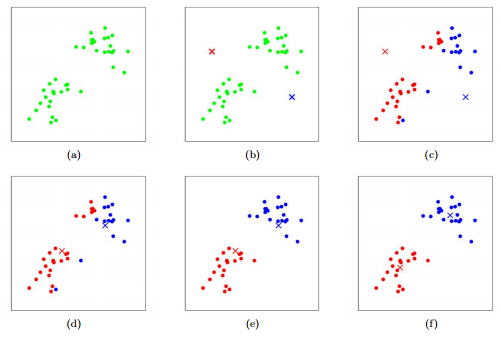

Fonte: https://stanford.edu/~cpiech/cs221/handouts/kmeans.html





In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km_model = KMeans(n_clusters=2, random_state=1234)
km_model.fit(X1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1234, tol=0.0001, verbose=0)

In [ ]:
from sklearn.metrics import accuracy_score

acc_km = round(accuracy_score(y1, km_model.predict(X1))*100,2)
print('Acurácia do modelo de KM: {}'.format(acc_km))

Acurácia do modelo de KM: 63.06


In [ ]:
# Printando os centróides
pd.DataFrame(km_model.cluster_centers_, columns=X1.columns)

,Passageiro_classe,Sexo,Idade,Num_Irmaos_Conjugue_a_Bordo,Num_Pais_Filhos_a_Bordo,Tarifa,Embarcou_C,Embarcou_Q,Embarcou_S
0,2.371345,0.336257,29.274240,0.527778,0.371345,24.044639,0.171053,9.356725e-02,0.735380
1,1.000000,0.607143,32.461429,0.571429,0.892857,222.853125,0.428571,-2.775558e-17,0.571429


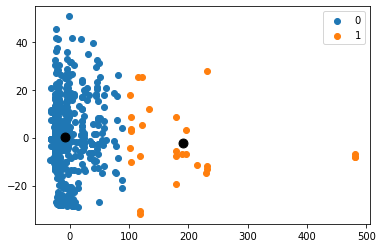

In [ ]:
# Função para visualizar os grupos encontrados pelo KMeans usando o PCA para redução da dimensionalidade
from sklearn.decomposition import PCA
import numpy as np
 
def plot_kmeans(data, pca, km_model):
    
    #Transforma os dados
    km_view = pca.fit_transform(data)
    
    #prediz os labels dos grupos.
    label = km_model.predict(data)
    
    #Obtendo os labels únicos
    u_labels = np.unique(label)
    
    #Plotando os resultados:
    for i in u_labels:
        plt.scatter(km_view[label == i , 0] , km_view[label == i , 1] , label = i)

    centroids = pca.transform(km_model.cluster_centers_)
    plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')

    plt.legend()
    plt.show()

pca = PCA(2, random_state=0)
plot_kmeans(X1, pca, km_model)

# **Avaliação de Resultados**

## Matriz de Confusão

Em problemas de Machine Learning é comum avaliarmos a performance dos modelos usando algumas métricas. A forma mais conhecida e simples de avaliar os resultados em modelos de machine learning supervisionados é a **Matriz de Confusão.**

A Matriz de Confusão é uma tabela que indica erros e acertos do modelo criado, comparando o resultado esperado.



*   **Verdadeiro Positivo**: Classificação correta da classe Sim;
*   **Falso Negativo**: Erro em que o modelo previu classe Não quando o valor real era Sim;
*   **Falso Positivo**: Erro em que o modelo previu a classe Sim quando o valor real era Não;
*   **Verdadeiro Negativo**: Classificação correta da classe Não.



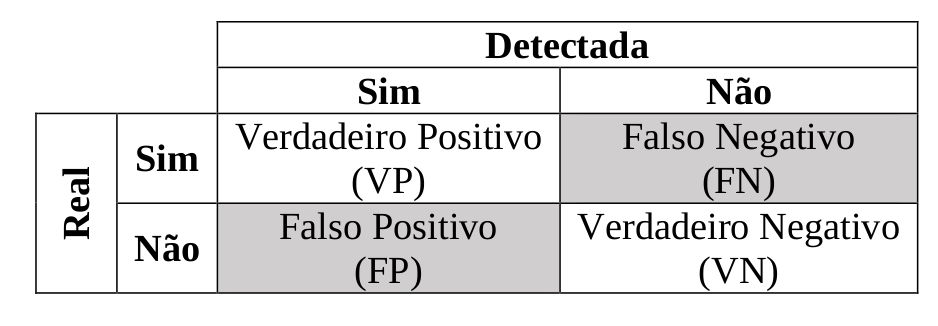






In [ ]:
# print matriz de confusão para Decision Tree
from sklearn import metrics

metrics.confusion_matrix(y2, dt_model.predict(X2))

array([[88, 22],
       [17, 52]])

## Métricas de Avaliação de resultados

Ao fazer a contabilização dos erros e acertos da matriz de confusão é possível calcular métricas de avaliação:

*   **Acurácia**: indica uma performance geral do modelo. Dentre todas as classificações, quantas o modelo classificou corretamente;
*   **Precisão**: dentre todas as classificações de classe Sim que o modelo fez, quantas estão corretas;
*  **Recall/Revocação/Sensibilidade**: dentre todas as situações de classe Sim como valor esperado, quantas estão corretas;
*   **F1-Score**: média harmônica entre precisão e recall.

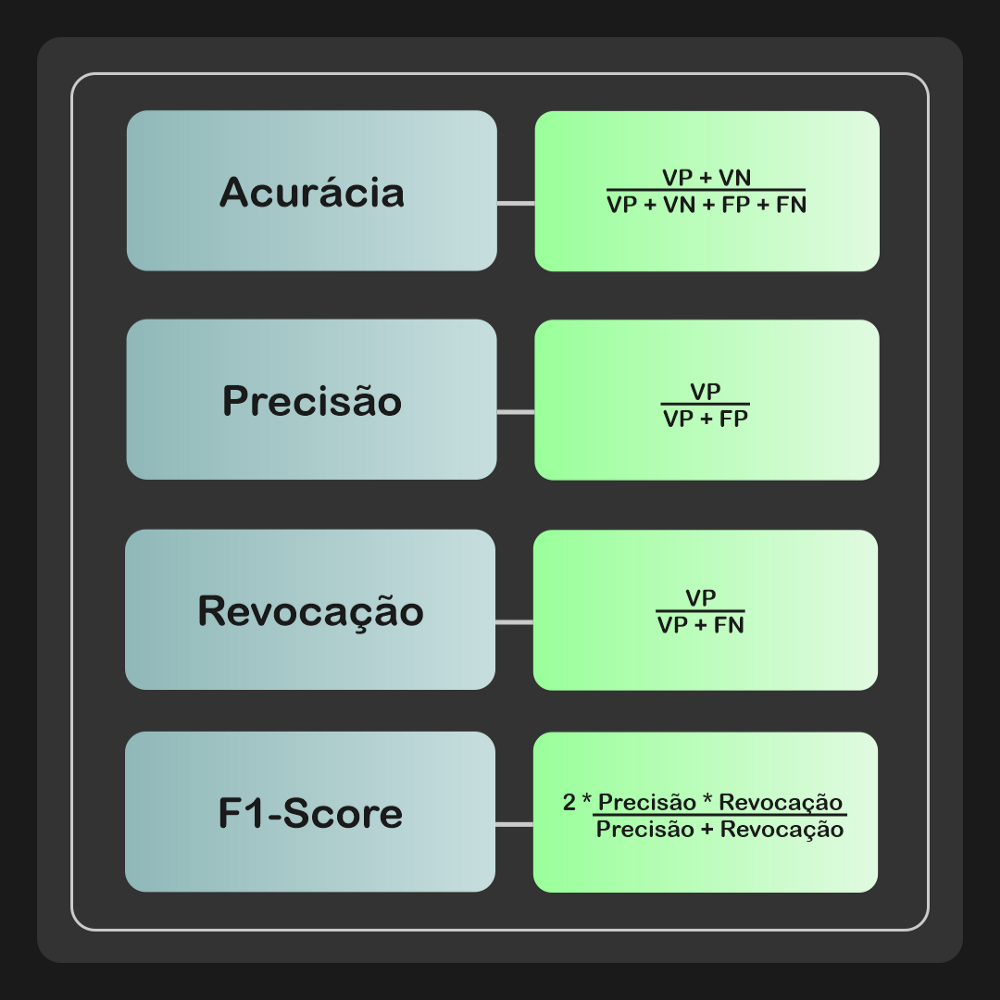

Fonte: https://www.instagram.com/p/BwK5Qw4FJZe/

### Quando usar as métricas?

A **acurácia** é uma boa indicação geral de como o modelo performou. Porém, pode haver situações em que ela é enganosa. (Ex.: Em uma situação hipotética de 280000 casos legais e 2000 casos fraudulentos, um modelo simplório que simplesmente classifica tudo como legal obteria uma acurácia de 99,3%. Ou seja, você estaria validando como ótimo um modelo que falha em detectar fraudes.)


A **precisão** pode ser usada em uma situação em que os Falsos Positivos são considerados mais prejudiciais que os Falsos Negativos.(Ex.: Modelo que classifica bons investimentos)

O **recall** pode ser usada em uma situação em que os Falsos Negativos são considerados mais prejudiciais que os Falsos Positivos.(Ex.: Modelo que classifica pacientes doentes)

O **F1-Score** é simplesmente uma maneira de observar somente 1 métrica ao invés de duas (precisão e recall) em alguma situação. Quando tem-se um F1-Score baixo, é um indicativo de que ou a precisão ou o recall está baixo.




In [ ]:
from sklearn import metrics

In [ ]:
results_dt = dt_model.predict(X2)
results_knn = knn_model.predict(X2)
results_lr = lr_model.predict(X2)
results_km = km_model.predict(X2)

### Resultados Logistic Regression 

In [ ]:
print(metrics.classification_report(y2,results_lr,target_names=['0', '1'], digits=3))

              precision    recall  f1-score   support

           0      0.830     0.845     0.838       110
           1      0.746     0.725     0.735        69

    accuracy                          0.799       179
   macro avg      0.788     0.785     0.787       179
weighted avg      0.798     0.799     0.798       179



### Resultados KNN

In [ ]:
print(metrics.classification_report(y2,results_knn,target_names=['0', '1'], digits=3))

              precision    recall  f1-score   support

           0      0.737     0.764     0.750       110
           1      0.600     0.565     0.582        69

    accuracy                          0.687       179
   macro avg      0.668     0.664     0.666       179
weighted avg      0.684     0.687     0.685       179



### Resultados Decision Tree 

In [ ]:
print(metrics.classification_report(y2,results_dt,target_names=['0', '1'], digits=3))

              precision    recall  f1-score   support

           0      0.838     0.800     0.819       110
           1      0.703     0.754     0.727        69

    accuracy                          0.782       179
   macro avg      0.770     0.777     0.773       179
weighted avg      0.786     0.782     0.783       179



### Resultados KMeans 

In [ ]:
print(metrics.classification_report(y2,results_km,target_names=['0', '1'], digits=3))

              precision    recall  f1-score   support

           0      0.645     0.991     0.781       110
           1      0.900     0.130     0.228        69

    accuracy                          0.659       179
   macro avg      0.772     0.561     0.505       179
weighted avg      0.743     0.659     0.568       179



### Visão geral dos resultados

In [ ]:
results_dt = dt_model.predict(X2)
results_knn = knn_model.predict(X2)
results_lr = lr_model.predict(X2)
results_km = km_model.predict(X2)

cols = ['Modelo', 'Precisão', 'Recall', 'F1-Score', 'Acurácia']
models = ['LR', 'KNN', 'DT', 'KM']
results = [results_lr, results_knn, results_dt, results_km]

df_result = pd.DataFrame(columns=cols, index=range(0,4))

for m,r,i in zip(models, results, range(0,4)):
    df_result.loc[i] = [m, 
                        metrics.precision_score(y2, r),
                        metrics.recall_score(y2, r),
                        metrics.f1_score(y2, r),
                        metrics.accuracy_score(y2, r)]
df_result

,Modelo,Precisão,Recall,F1-Score,Acurácia
0,LR,0.746269,0.724638,0.735294,0.798883
1,KNN,0.6,0.565217,0.58209,0.687151
2,DT,0.702703,0.753623,0.727273,0.782123
3,KM,0.9,0.130435,0.227848,0.659218


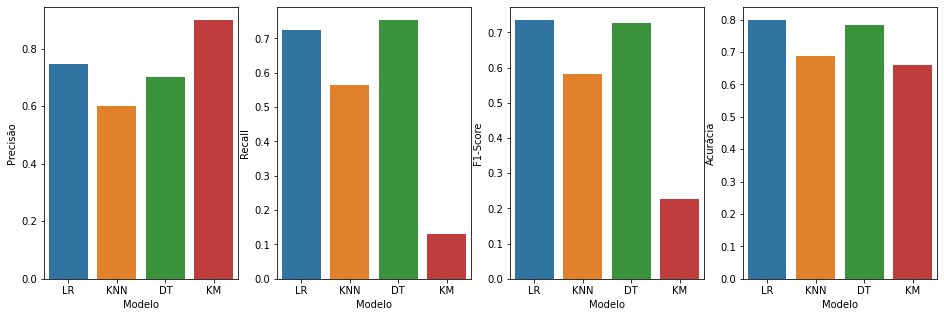

In [ ]:
# Plot para as métricas de Precisão Recall F1-Score e Acurácia
fig, (axis1, axis2, axis3, axis4) = plt.subplots(1,4, figsize=(16,5))

sns.barplot(x='Modelo', y='Precisão', data=df_result, ax=axis1)
sns.barplot(x='Modelo', y='Recall', data=df_result, ax=axis2)
sns.barplot(x='Modelo', y='F1-Score', data=df_result, ax=axis3)
sns.barplot(x='Modelo', y='Acurácia', data=df_result, ax=axis4);

# **Referências**:
* Exemplo de KDD com dados Titanic: https://github.com/carlosfab/data_science/blob/master/Titanic.ipynb
* Thoughful Machine Learning: https://www.amazon.com.br/dp/B01N12DLF9/ref=dp-kindle-redirect?_encoding=UTF8&btkr=1
* *Fonte: [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) de Jake VanderPlas; o contéudo está disponível no [GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*
